<a href="https://colab.research.google.com/github/marreapato/Explainable-AI-Time-Series/blob/main/projeto-2/Projeto2_Alana_Lucas_david_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
        !pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=1f5f5c7f391c31bb64ba699efb133120170c4efc16574ad950b033090f2feff0
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


## **Projeto 2 - Tópicos Avançados em Inteligência Computacional 2**

**David Edson Ribeiro** e **Lucas Rabelo de Araujo Morais**

In [ ]:
import pandas as pd
import requests
from io import StringIO
import pydotplus #pip install pydotplus
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix

# URL of the CSV file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"

# Send a GET request to the URL
response = requests.get(url)

# Read the content of the response as a string
data = response.text

# Use StringIO to convert the string to a file-like object
csv_file = StringIO(data)

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Now you have the data in the DataFrame 'df'
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

A Base escolhida foi a **Heart Failure Clinical Records**, disponível em [UCI](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records).

O conjunto de dados inclui as seguintes variáveis:

1. **Idade (Age):** Representa a idade do paciente em anos. Os valores variam de 40 a 95 anos.

2. **Anemia (Anaemia):** Indica se o paciente apresenta redução de glóbulos vermelhos ou hemoglobina. É uma variável booleana, onde 0 representa a ausência de anemia e 1 representa a presença.

3. **Pressão alta (High blood pressure):** Indica se o paciente tem hipertensão. Também é uma variável booleana, com 0 representando a ausência de pressão alta e 1 representando sua presença.

4. **Creatinofosfoquinase (Creatinine phosphokinase):** Refere-se ao nível da enzima CPK no sangue, medido em mcg/L. Os valores variam de 23 a 7861 mcg/L.

5. **Diabetes (Diabetes):** Indica se o paciente tem diabetes. Assim como as variáveis anteriores, é uma variável booleana, com 0 indicando a ausência de diabetes e 1 indicando sua presença.

6. **Fração de ejeção (Ejection fraction):** Representa a porcentagem de sangue que deixa o coração em cada contração. É expressa como uma porcentagem, variando de 14% a 80%.

7. **Sexo (Sex):** Indica o sexo do paciente, com 0 representando mulher e 1 representando homem.

8. **Plaquetas (Platelets):** Refere-se à contagem de plaquetas no sangue, medida em kiloplaquetas/mL. Os valores variam de 25.01 a 850.00 kiloplaquetas/mL.

9. **Creatinina sérica (Serum creatinine):** Indica o nível de creatinina no sangue, medido em mg/dL. Os valores variam de 0.50 a 9.40 mg/dL.

10. **Sódio sérico (Serum sodium):** Representa o nível de sódio no sangue, medido em mEq/L. Os valores variam de 114 a 148 mEq/L.

11. **Tabagismo (Smoking):** Indica se o paciente é fumante (1) ou não (0).

12. **Tempo (Time):** Refere-se ao período de acompanhamento em dias, variando de 4 a 285 dias.

13. **Evento de morte (death event):** Esta é a variável alvo. Indica se o paciente faleceu durante o período de acompanhamento. É uma variável booleana, com 0 representando a sobrevivência do paciente durante o período e 1 representando a ocorrência de morte.

O Objetivo é prever a sobrevivência de pacientes que possuem Insuficiência Cardiaca, que faz o coração falhar em bombear sangue para as necessidades do corpo. A Base possui 299 Instâncias que representam os pacientes do *Faisalabad Institute of Cardiology* e o *Allied Hospital in Faisalabad*
(Punjab, Pakistan) realizado no ano de 2015.  

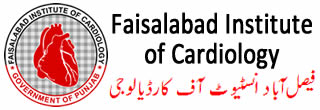

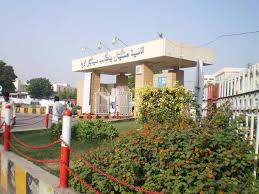 **Allied Hospital in Faisalabad**

As doenças cardiovasculares matam aproximadamente 17 milhões de pessoas em todo o mundo todos os anos, e principalmente apresentam como infartos do miocárdio e insuficiência cardíaca. A insuficiência cardíaca (IC) ocorre quando o coração não consegue bombear o suficiente sangue para atender às necessidades do corpo.










## Análise Descritiva e Exploratória

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Sempre que temos pesquisas na área de saúde com fatores de risco em casos clinicos, temos o senso comum de ao ver a palavra fumante compreender quie já seria um fator muito decisivo.Como uma das features é se a pessoa é fumante, o cigarro tende a ser um vilão aceitável. Mas na base parece não ser o fator mais importante.

In [ ]:
import seaborn as sns

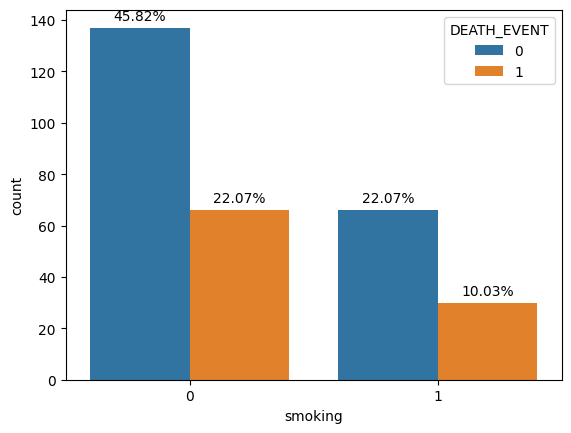

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
ax = sns.countplot(x='smoking', hue='DEATH_EVENT', data=df)

# Calculate proportions
total = len(df['smoking'])
for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Add this condition to avoid displaying "00%" for zero counts
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:.2f}%'.format((height/total) * 100),
                ha="center")

plt.show()


É possível que exista um viés na base de dados, visto que de 105 mulheres, apenas aproximadamente 4% possuíam o hábito de fumar

In [ ]:
df.groupby(['sex', 'smoking', 'DEATH_EVENT']).size().reset_index(name='count')

,sex,smoking,DEATH_EVENT,count
0,0,0,0,70
1,0,0,1,31
2,0,1,0,1
3,0,1,1,3
4,1,0,0,67
5,1,0,1,35
6,1,1,0,65
7,1,1,1,27


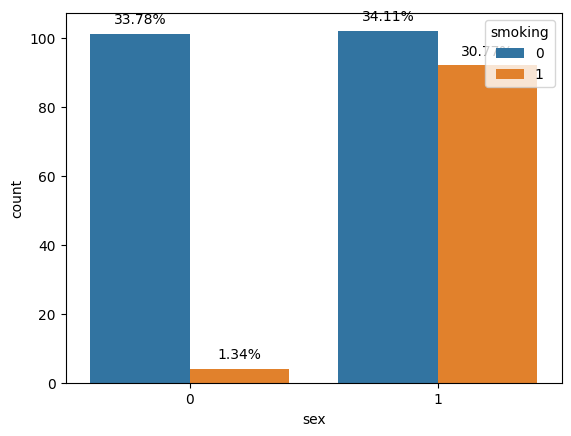

In [ ]:
# Create the countplot
ax = sns.countplot(x='sex', hue='smoking', data=df)

# Calculate proportions
total = len(df['sex'])
for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Add this condition to avoid displaying "00%" for zero counts
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:.2f}%'.format((height/total) * 100),
                ha="center")

plt.show()

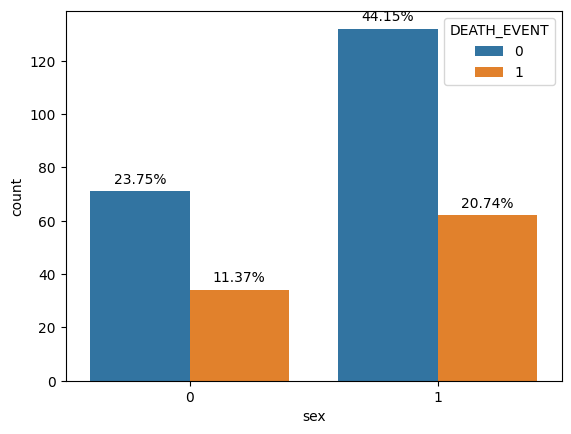

In [ ]:
# Create the countplot
ax = sns.countplot(x='sex', hue='DEATH_EVENT', data=df)

# Calculate proportions
total = len(df['sex'])
for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Add this condition to avoid displaying "00%" for zero counts
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:.2f}%'.format((height/total) * 100),
                ha="center")

plt.show()

## Ajuste de Modelos e Incerteza

In [ ]:
X = df.drop(["DEATH_EVENT"],axis = 1)
y = df[["DEATH_EVENT"]]

Split de 75 - 25

In [ ]:
trainX, testX, trainy, testy = train_test_split(X,y,test_size = 0.20,random_state=32,stratify=y)

 - **Salvando testes para Investigação da incerteza**

In [ ]:
test_incertitumbre = testX
test_incertitumbre.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
256,65.0,0,326,0,38,0,294000.0,1.7,139,0,0,220
29,82.0,0,70,1,30,0,200000.0,1.2,132,1,1,26
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256
274,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,245


PCA Para plot das incertezas

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

o PCA condensa 99% da variação dos dados.

In [ ]:
X_test_pca = pca.fit_transform(testX)
pca.explained_variance_ratio_.sum()

0.999999426285683

In [ ]:
pca.explained_variance_ratio_

array([9.99928543e-01, 7.08836406e-05])

### Modelo M1

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 2,max_depth = 2)
model.fit(trainX,trainy)
M1 = model.predict_proba(testX)

O modelo de árvore de decisão apresenta uma acurácia geral de 72%, o que indica que ele classifica corretamente 72% dos casos. Especificamente, ele alcança uma precisão de 74% na previsão de sobrevivência (classe 0) e uma precisão de 60% na previsão de morte (classe 1). No entanto, é importante notar que o modelo tem um recall mais alto para a classe 0 (90%), o que significa que ele identifica a sobrevivência com mais eficácia do que a morte. Isso é confirmado pela pontuação F1, que combina precisão e recall, sendo 81% para a classe 0 e 41% para a classe 1. Portanto, enquanto o modelo é razoavelmente preciso na previsão de sobrevivência, sua capacidade de prever mortes é menos satisfatória, sugerindo que pode haver espaço para melhorias na detecção de casos fatais.

In [ ]:
print(classification_report(testy,model.predict(testX)))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        41
           1       0.60      0.32      0.41        19

    accuracy                           0.72        60
   macro avg       0.67      0.61      0.61        60
weighted avg       0.70      0.72      0.69        60



In [ ]:
m1_incertezas = pd.DataFrame({"M1_C1":M1[:,0],"M1_C2":M1[:,1]})
m1_incertezas.head()

,M1_C1,M1_C2
0,0.529412,0.470588
1,0.500000,0.500000
2,0.931034,0.068966
3,0.931034,0.068966
4,0.931034,0.068966


In [ ]:
m1_incertezas['incerteza_m1'] = 1-m1_incertezas.max(axis=1)
m1_incertezas.head()

,M1_C1,M1_C2,incerteza_m1
0,0.529412,0.470588,0.470588
1,0.500000,0.500000,0.500000
2,0.931034,0.068966,0.068966
3,0.931034,0.068966,0.068966
4,0.931034,0.068966,0.068966


### Modelo M2

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', random_state=1,probability = True)
model.fit(trainX,np.array(trainy).reshape(-1))
M2 = model.predict_proba(testX)


O modelo de Support Vector Machine (SVC) com kernel RBF (Radial Basis Function) apresenta uma acurácia geral de 75%, indicando que ele classifica corretamente 75% dos casos. Especificamente, o modelo atinge uma precisão de 76% na previsão de sobrevivência (classe 0) e uma precisão de 70% na previsão de morte (classe 1). No entanto, o recall é mais alto para a classe 0 (93%) em comparação com a classe 1 (37%), sugerindo que o modelo é mais eficaz na identificação de casos de sobrevivência do que de morte. Isso é refletido nas pontuações F1, que são de 84% para a classe 0 e 48% para a classe 1. Portanto, embora o modelo tenha um desempenho geral razoável, há espaço para melhorias na detecção de casos fatais.

In [ ]:
print(classification_report(testy,model.predict(testX)))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        41
           1       0.70      0.37      0.48        19

    accuracy                           0.75        60
   macro avg       0.73      0.65      0.66        60
weighted avg       0.74      0.75      0.72        60



In [ ]:
m2_incertezas = pd.DataFrame({"M2_C1":M2[:,0],"M2_C2":M2[:,1]})
m2_incertezas.head()

,M2_C1,M2_C2
0,0.909256,0.090744
1,0.197655,0.802345
2,0.883788,0.116212
3,0.883851,0.116149
4,0.833436,0.166564


In [ ]:
m2_incertezas['incerteza_m2'] = 1-m2_incertezas.max(axis=1)
m2_incertezas.head()

,M2_C1,M2_C2,incerteza_m2
0,0.909256,0.090744,0.090744
1,0.197655,0.802345,0.197655
2,0.883788,0.116212,0.116212
3,0.883851,0.116149,0.116149
4,0.833436,0.166564,0.166564


### Modelo M3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(trainX,trainy)
M3 = model.predict_proba(testX)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


O modelo k-Nearest Neighbors (kNN) com 5 vizinhos apresenta uma Acurácia geral de 65%, indicando que ele classifica corretamente 65% dos casos. Especificamente, o modelo atinge uma precisão de 70% na previsão de sobrevivência (classe 0) e uma precisão de 40% na previsão de morte (classe 1). O recall é mais alto para a classe 0 (85%) em comparação com a classe 1 (21%), sugerindo que o modelo é mais eficaz na identificação de casos de sobrevivência do que de morte. Isso é refletido nas pontuações F1, que são de 77% para a classe 0 e 28% para a classe 1. No geral, o modelo kNN com 5 vizinhos demonstra um desempenho modesto na classificação dos casos, com um equilíbrio entre precisão e recall que pode ser melhorado.

In [ ]:
print(classification_report(testy,model.predict(testX)))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        41
           1       0.40      0.21      0.28        19

    accuracy                           0.65        60
   macro avg       0.55      0.53      0.52        60
weighted avg       0.60      0.65      0.61        60



In [ ]:
m3_incertezas = pd.DataFrame({"M3_C1":M3[:,0],"M3_C2":M3[:,1]})
m3_incertezas.head()

,M3_C1,M3_C2
0,0.8,0.2
1,0.6,0.4
2,1.0,0.0
3,0.8,0.2
4,0.8,0.2


In [ ]:
m3_incertezas['incerteza_m3'] = 1-m3_incertezas.max(axis=1)
m3_incertezas.head()

,M3_C1,M3_C2,incerteza_m3
0,0.8,0.2,0.2
1,0.6,0.4,0.4
2,1.0,0.0,0.0
3,0.8,0.2,0.2
4,0.8,0.2,0.2


### Calculo da Incerteza dos Modelos Classe 1

In [ ]:
incer_models = pd.DataFrame({"M1":m1_incertezas['incerteza_m1'],"M2":m2_incertezas['incerteza_m2'],
                          "M3":m3_incertezas['incerteza_m3']})
incer_models.head()

,M1,M2,M3
0,0.470588,0.090744,0.2
1,0.500000,0.197655,0.4
2,0.068966,0.116212,0.0
3,0.068966,0.116149,0.2
4,0.068966,0.166564,0.2


In [ ]:
incer_models['medias_probs'] = incer_models.mean(axis=1)
incer_models.head()

,M1,M2,M3,medias_probs
0,0.470588,0.090744,0.2,0.253777
1,0.500000,0.197655,0.4,0.365885
2,0.068966,0.116212,0.0,0.061726
3,0.068966,0.116149,0.2,0.128372
4,0.068966,0.166564,0.2,0.145177


### Epistemica

In [ ]:
incer_models['var_probs'] = incer_models.var(axis=1)
incer_models.head()

,M1,M2,M3,medias_probs,var_probs
0,0.470588,0.090744,0.2,0.253777,0.025493
1,0.500000,0.197655,0.4,0.365885,0.015817
2,0.068966,0.116212,0.0,0.061726,0.002277
3,0.068966,0.116149,0.2,0.128372,0.002936
4,0.068966,0.166564,0.2,0.145177,0.003090


### Analise Exploratoria - Incerteza Associada

Epistemica

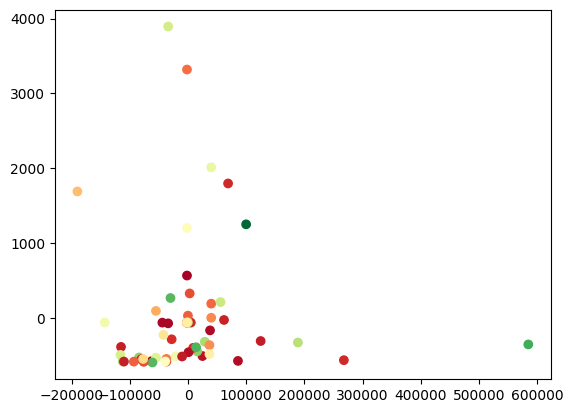

In [ ]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1],c=(incer_models['var_probs']),cmap='RdYlGn')

Considerando o Pool de Modelos (M1, M2 e M3), muitas instâncias estão em vermelho, com pouca prevalencia de instâncias em verde claro e verde. Mostrando a consistência dos modelos em capturar a incerteza das instâncias em vermelho. As instâncias em verde e amarelo foram as que mais foram afetadas pela incerteza intrínseca da escolha do modelo, as instâncias em verde escuro mostram que existem uma alta variância nas incertezas associadas aos modelos, sendo as mais afetadas pela escolha do modelo correto.

Aleatoria

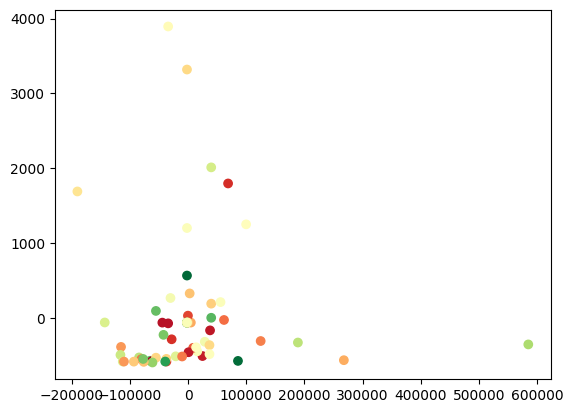

In [ ]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1],c=(incer_models['medias_probs']),cmap='RdYlGn')

Considerando o Pool de Modelos (M1, M2 e M3), o modelo Knn parece ter aumentado as estimativas de incerteza, visto que a incerteza das instâncias no modelo **M3** foi muito grande, boa parte das instâncias aparentam ter uma moderada incerteza aleatória associada, com muitas instâncias em amarelo e vermelho claro, poucas instâncias aparecem totalmente em verde (representando uma alta incerteza aleatória). É interessante notar que, como o experimento não é controlado, muitos fatores externos podem ter contribuido para o aumento da incerteza aleatória em diversas instâncias

### Análise Exploratoria - Características dos pacientes e Incerteza Associada

In [ ]:
test_incertitumbre['incerteza_aleatoria'] = np.array(incer_models['medias_probs'])

test_incertitumbre['incerteza_epistemica'] = np.array(incer_models[['var_probs']])
test_incertitumbre.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,incerteza_aleatoria,incerteza_epistemica
256,65.0,0,326,0,38,0,294000.0,1.7,139,0,0,220,0.253777,0.025493
29,82.0,0,70,1,30,0,200000.0,1.2,132,1,1,26,0.365885,0.015817
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194,0.061726,0.002277
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0.128372,0.002936
274,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,245,0.145177,0.003090


In [ ]:
test_incertitumbre['incerteza_aleatoria'].quantile([0.25, 0.5, 0.75])

0.25    0.140392
0.50    0.219732
0.75    0.294189
Name: incerteza_aleatoria, dtype: float64

A classificação entre alta e baixa incerteza aleatória é estabelecida com base nos quantis da distribuição da variável de incerteza. Ao calcular os quartis da incerteza aleatória, divide-se os dados em partes iguais, permitindo uma compreensão da dispersão dos valores. Se a incerteza aleatória de um paciente ultrapassa o limite de 0.20, é classificada como alta, indicando uma considerável variação nos resultados das previsões. Por outro lado, se a incerteza é igual ou inferior a 0.20, é considerada baixa, sugerindo uma maior confiabilidade nas previsões realizadas pelos modelos. Essa distinção auxilia na compreensão da confiabilidade das previsões.

In [ ]:
test_incertitumbre.loc[test_incertitumbre['incerteza_aleatoria'] > 0.20, 'tipo_incerteza'] = 'Alta'
test_incertitumbre.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,incerteza_aleatoria,incerteza_epistemica,tipo_incerteza
256,65.0,0,326,0,38,0,294000.0,1.7,139,0,0,220,0.253777,0.025493,Alta
29,82.0,0,70,1,30,0,200000.0,1.2,132,1,1,26,0.365885,0.015817,Alta
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194,0.061726,0.002277,NaN
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0.128372,0.002936,NaN
274,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,245,0.145177,0.003090,NaN


In [ ]:
test_incertitumbre.loc[test_incertitumbre['incerteza_aleatoria'] <= 0.20, 'tipo_incerteza'] = 'Baixa'
test_incertitumbre.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,incerteza_aleatoria,incerteza_epistemica,tipo_incerteza
256,65.0,0,326,0,38,0,294000.0,1.7,139,0,0,220,0.253777,0.025493,Alta
29,82.0,0,70,1,30,0,200000.0,1.2,132,1,1,26,0.365885,0.015817,Alta
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194,0.061726,0.002277,Baixa
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0.128372,0.002936,Baixa
274,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,245,0.145177,0.003090,Baixa


## Análise Exploratória e investigação da Incerteza

A correlação entre idade e incerteza é moderada, sendo de 30%, portanto não é razoável discernir que a idade é o fator preponderante para que haja a incerteza, apesar da leve correlação entre idade e incerteza

In [ ]:
from scipy.stats import pearsonr

# Assuming X and Y are your variables as numpy arrays
correlation, _ = pearsonr(test_incertitumbre['age'],test_incertitumbre['incerteza_aleatoria'])

print("Correlation between X and Y:", correlation)

Correlation between X and Y: 0.3025940986301494


#### Análise das categorias

As maiores incertezas aleatorias estão associadas aos indivíduos do sexo masculino enquanto em indivíduos do sexo feminino a maior categoria de incerteza aleatória é a menor. Ou seja para homens a incerteza foi muito maior, é interessante investigar os hábitos de fumo por sexo, e idade por sexo para verificar se podem ter alguma relação entre essas variáveis e a incerteza aleatória

In [ ]:
grouped_data = test_incertitumbre.groupby(['sex', 'tipo_incerteza']).size().reset_index(name='count')
grouped_data

,sex,tipo_incerteza,count
0,0,Alta,8
1,0,Baixa,14
2,1,Alta,24
3,1,Baixa,14


In [ ]:
total_by_sex = grouped_data.groupby('sex')['count'].transform('sum')
total_by_sex

0    22
1    22
2    38
3    38
Name: count, dtype: int64

In [ ]:
grouped_data['proportion'] = grouped_data['count'] / total_by_sex

grouped_data

,sex,tipo_incerteza,count,proportion
0,0,Alta,8,0.363636
1,0,Baixa,14,0.636364
2,1,Alta,24,0.631579
3,1,Baixa,14,0.368421


A incerteza aleatória com base no sexo (com as proporções de alta e baixa incerteza calculadas com base no total de sexo) revela padrões distintos entre mulheres e homens. Notavelmente, para cada 10 previsões de sobrevivência em mulheres, aproximadamente 6 estão associadas a uma baixa incerteza, indicando uma consistência relativamente alta nas previsões feitas para este grupo. Por outro lado, o comportamento observado em relação aos homens é inverso, onde para cada 10 previsões realizadas, cerca de 6 estão envoltas em alta incerteza. Isso sugere uma variação significativa nos resultados das previsões para os homens, destacando a complexidade subjacente nos dados e a necessidade de uma abordagem mais cautelosa ao interpretar e tomar decisões com base nas previsões do modelo.

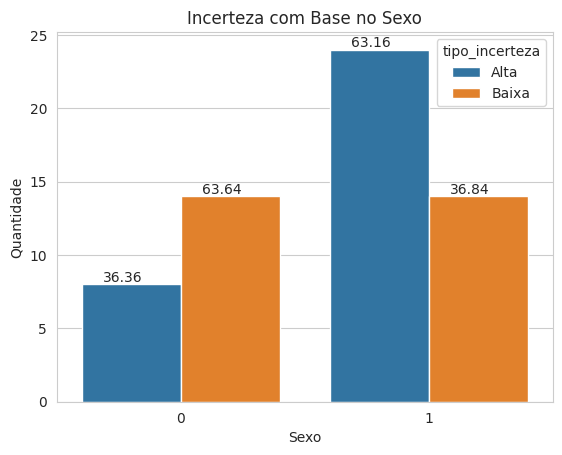

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the bar plot with Seaborn
ax = sns.countplot(x="sex", hue="tipo_incerteza", data=test_incertitumbre)

# Add legend based on the 'tipo_incerteza' column
ax.legend(title='tipo_incerteza')

# Add labels and title
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Incerteza com Base no Sexo')

# Group the data by 'sex' and 'tipo_incerteza' and calculate proportions for each group
grouped_data = test_incertitumbre.groupby(['sex', 'tipo_incerteza']).size().reset_index(name='count')
total_by_sex = grouped_data.groupby('sex')['count'].transform('sum')
grouped_data['proportion'] = grouped_data['count'] / total_by_sex

# Calculate bar positions and adjust slightly for better placement
bars = ax.patches  # Get bar patch objects (assuming recent Seaborn version)
num_bars = len(bars) // 2  # Assuming equal number of bars per category

# Get bar width based on x-axis limits and number of bars
x_min, x_max = plt.xlim()
bar_width = (x_max - x_min) / (num_bars * 2)  # Dividing by 2 because of two hue groups

x_positions = [(rect.get_x() + bar_width / 2) for rect in bars]  # Center of each bar

# Annotate proportions on top of bars with some offset
for i, row in grouped_data.iterrows():
    # Calculate the index for the current hue group (Alta and Baixa)
    hue_group_index = 0 if row['tipo_incerteza'] == 'Alta' else 1
    # Calculate the overall index for the current category (0 and 1) within the hue group
    overall_index = (hue_group_index * 2) + int(row['sex'])
    proportion = f"{row['proportion']*100:.2f}"  # Format proportion to two decimals
    plt.annotate(proportion, (x_positions[overall_index], bars[overall_index].get_height()), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()


Considerando os hábitos de fumo dos pacientes, há uma distinção marcante na incerteza das previsões. Dentre as previsões para os pacientes que fumam, apenas 3 em cada 10 estão na categoria de baixa incerteza, sugerindo uma considerável variabilidade nos resultados das previsões para esse grupo. Em contraste, para os pacientes não fumantes, os resultados são mais variados, visto que 5 em cada 10 estão na categoria de baixa incerteza. Isso indica uma relativa consistência nas previsões para pacientes não fumantes, embora ainda haja espaço para melhorias, especialmente ao lidar com diferentes hábitos de vida dos pacientes.

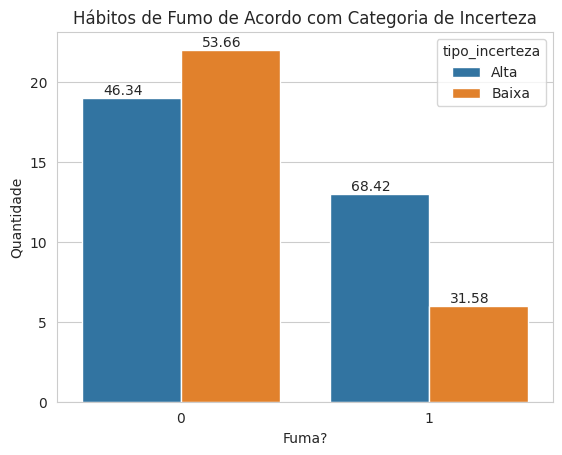

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the bar plot with Seaborn
ax = sns.countplot(x="smoking", hue="tipo_incerteza", data=test_incertitumbre)

# Add legend based on the 'tipo_incerteza' column
ax.legend(title='tipo_incerteza')

# Add labels and title
plt.xlabel('Fuma?')
plt.ylabel('Quantidade')
plt.title('Hábitos de Fumo de Acordo com Categoria de Incerteza')

# Group the data by 'smoking' and 'tipo_incerteza' and calculate proportions for each group
grouped_data = test_incertitumbre.groupby(['smoking', 'tipo_incerteza']).size().reset_index(name='count')
total_by_smoking = grouped_data.groupby('smoking')['count'].transform('sum')
grouped_data['proportion'] = grouped_data['count'] / total_by_smoking

# Calculate bar positions and adjust slightly for better placement
bars = ax.patches  # Get bar patch objects (assuming recent Seaborn version)
num_bars = len(bars) // 2  # Assuming equal number of bars per category

# Get bar width based on x-axis limits and number of bars
x_min, x_max = plt.xlim()
bar_width = (x_max - x_min) / (num_bars * 2)  # Dividing by 2 because of two hue groups

x_positions = [(rect.get_x() + bar_width / 2) for rect in bars]  # Center of each bar

# Annotate proportions on top of bars with some offset
for i, row in grouped_data.iterrows():
    # Calculate the index for the current hue group (Alta and Baixa)
    hue_group_index = 0 if row['tipo_incerteza'] == 'Alta' else 1
    # Calculate the overall index for the current category (0 and 1) within the hue group
    overall_index = (hue_group_index * 2) + int(row['smoking'])
    proportion = f"{row['proportion']*100:.2f}"  # Format proportion to two decimals
    plt.annotate(proportion, (x_positions[overall_index], bars[overall_index].get_height()), ha='center', va='bottom', fontsize=10)


# Display the plot
plt.show()


Para os pacientes com anemia, as previsões revelam uma tendência significativa: 6 em cada 10 pacientes estão associados a uma alta incerteza aleatória. Isso sugere uma considerável variabilidade nos resultados das previsões para esse grupo específico, possivelmente devido à complexidade adicional introduzida pela condição da anemia. Por outro lado, para os pacientes sem anemia, os resultados são mistos, com 5 em cada 10 pacientes na categoria de baixa incerteza. Essa diferença indica uma possível relação entre a presença de anemia e a incerteza nas previsões, destacando a importância de considerar fatores clínicos específicos.

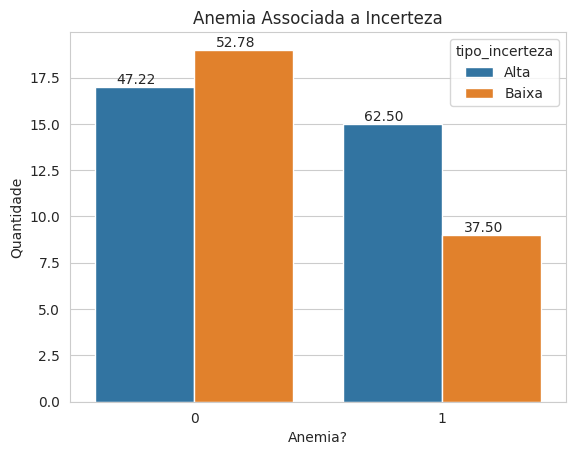

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the bar plot with Seaborn
ax = sns.countplot(x="anaemia", hue="tipo_incerteza", data=test_incertitumbre)

# Add legend based on the 'tipo_incerteza' column
ax.legend(title='tipo_incerteza')

# Add labels and title
plt.xlabel('Anemia?')
plt.ylabel('Quantidade')
plt.title('Anemia Associada a Incerteza')

# Group the data by 'anaemia' and 'tipo_incerteza' and calculate proportions for each group
grouped_data = test_incertitumbre.groupby(['anaemia', 'tipo_incerteza']).size().reset_index(name='count')
total_by_anaemia = grouped_data.groupby('anaemia')['count'].transform('sum')
grouped_data['proportion'] = grouped_data['count'] / total_by_anaemia * 100  # Multiply by 100 for percentage

# Calculate bar positions and adjust slightly for better placement
bars = ax.patches  # Get bar patch objects (assuming recent Seaborn version)
num_bars = len(bars) // 2  # Assuming equal number of bars per category

# Get bar width based on x-axis limits and number of bars
x_min, x_max = plt.xlim()
bar_width = (x_max - x_min) / (num_bars * 2)  # Dividing by 2 because of two hue groups

x_positions = [(rect.get_x() + bar_width / 2) for rect in bars]  # Center of each bar

# Annotate proportions on top of bars with some offset
for i, row in grouped_data.iterrows():
    # Calculate the index for the current hue group (Alta and Baixa)
    hue_group_index = 0 if row['tipo_incerteza'] == 'Alta' else 1
    # Calculate the overall index for the current category (0 and 1) within the hue group
    overall_index = (hue_group_index * 2) + int(row['anaemia'])
    proportion = f"{row['proportion']:.2f}"  # Format proportion to two decimals
    plt.annotate(proportion, (x_positions[overall_index], bars[overall_index].get_height()), ha='center', va='bottom', fontsize=10)


# Display the plot
plt.show()


#### Fumo e incerteza em Homens

O gráfico abaixo evidencia que o menor grau de incerteza está associado aos homens que não possuem o hábito do fumo, onde aproximadamente 6 em cada 10 homens estão vinculados à baixa incerteza aleatória. Esta tendência sugere uma maior confiabilidade nas previsões para homens não fumantes, indicando uma possível influência positiva da ausência de tabagismo nas previsões. Em contrapartida, para homens fumantes, apenas 3 em cada 10 estão na categoria de baixa incerteza. Essa disparidade ressalta a influência do hábito de fumar na incerteza das previsões, sugerindo que o tabagismo pode contribuir para uma maior variabilidade nos resultados previstos pelo pool de modelos.

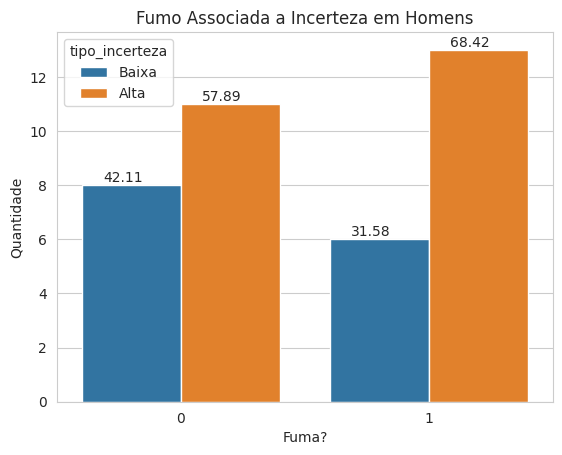

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the bar plot with Seaborn
ax = sns.countplot(x="smoking", hue="tipo_incerteza", data=test_incertitumbre[test_incertitumbre['sex']==1])

# Add legend based on the 'tipo_incerteza' column
ax.legend(title='tipo_incerteza')

# Add labels and title
plt.xlabel('Fuma?')
plt.ylabel('Quantidade')
plt.title('Fumo Associada a Incerteza em Homens')

# Group the data by 'smoking' and 'tipo_incerteza' and calculate proportions for each group
grouped_data = test_incertitumbre[test_incertitumbre['sex']==1].groupby(['smoking', 'tipo_incerteza']).size().reset_index(name='count')
total_by_smoking = grouped_data.groupby('smoking')['count'].transform('sum')
grouped_data['proportion'] = grouped_data['count'] / total_by_smoking * 100  # Multiply by 100 for percentage

# Calculate bar positions and adjust slightly for better placement
bars = ax.patches  # Get bar patch objects (assuming recent Seaborn version)
num_bars = len(bars) // 2  # Assuming equal number of bars per category

# Get bar width based on x-axis limits and number of bars
x_min, x_max = plt.xlim()
bar_width = (x_max - x_min) / (num_bars * 2)  # Dividing by 2 because of two hue groups

x_positions = [(rect.get_x() + bar_width / 2) for rect in bars]  # Center of each bar

# Annotate proportions on top of bars with some offset
for i, row in grouped_data.iterrows():
    # Calculate the index for the current hue group (Alta and Baixa)
    hue_group_index = 0 if row['tipo_incerteza'] == 'Baixa' else 1
    # Calculate the overall index for the current category (0 and 1) within the hue group
    overall_index = (hue_group_index * 2) + int(row['smoking'])
    proportion = f"{row['proportion']:.2f}"  # Format proportion to two decimals
    plt.annotate(proportion, (x_positions[overall_index], bars[overall_index].get_height()), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()


### Mulheres e Anemia

Para mulheres sem anemia, observa-se uma tendência significativa: praticamente 8 em cada 10 mulheres possuem uma baixa incerteza aleatória nas previsões. Isso sugere uma consistência notável e uma maior confiabilidade nas previsões para este grupo específico de pacientes. Por outro lado, para as mulheres com anemia, os resultados são mais variados, onde 5 em cada 10 possuem uma alta incerteza.

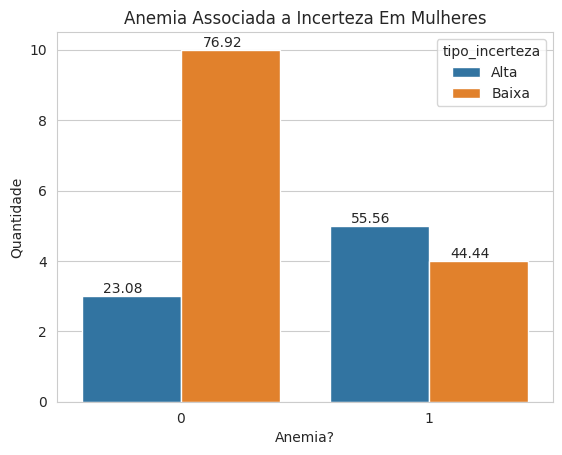

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the bar plot with Seaborn
ax = sns.countplot(x="anaemia", hue="tipo_incerteza", data=test_incertitumbre[test_incertitumbre['sex']==0])

# Add legend based on the 'tipo_incerteza' column
ax.legend(title='tipo_incerteza')

# Add labels and title
plt.xlabel('Anemia?')
plt.ylabel('Quantidade')
plt.title('Anemia Associada a Incerteza Em Mulheres')

# Group the data by 'anaemia' and 'tipo_incerteza' and calculate proportions for each group
grouped_data = test_incertitumbre[test_incertitumbre['sex']==0].groupby(['anaemia', 'tipo_incerteza']).size().reset_index(name='count')
total_by_anaemia = grouped_data.groupby('anaemia')['count'].transform('sum')
grouped_data['proportion'] = grouped_data['count'] / total_by_anaemia * 100  # Multiply by 100 for percentage

# Calculate bar positions and adjust slightly for better placement
bars = ax.patches  # Get bar patch objects (assuming recent Seaborn version)
num_bars = len(bars) // 2  # Assuming equal number of bars per category

# Get bar width based on x-axis limits and number of bars
x_min, x_max = plt.xlim()
bar_width = (x_max - x_min) / (num_bars * 2)  # Dividing by 2 because of two hue groups

x_positions = [(rect.get_x() + bar_width / 2) for rect in bars]  # Center of each bar

# Annotate proportions on top of bars with some offset
for i, row in grouped_data.iterrows():
    # Calculate the index for the current hue group (Alta and Baixa)
    hue_group_index = 0 if row['tipo_incerteza'] == 'Alta' else 1
    # Calculate the overall index for the current category (0 and 1) within the hue group
    overall_index = (hue_group_index * 2) + int(row['anaemia'])
    proportion = f"{row['proportion']:.2f}"  # Format proportion to two decimals
    plt.annotate(proportion, (x_positions[overall_index], bars[overall_index].get_height()), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()


Para homens, a presença do hábito de fumar está fortemente associada a uma alta incerteza, onde apenas 3 em cada 10 homens fumantes estão na categoria de baixa incerteza, enquanto que para homens não fumantes, esse número aumenta para quase 6 em cada 10. Por outro lado, para mulheres, a presença de anemia desempenha um papel crucial na incerteza das previsões, com 5 em cada 10 mulheres anêmicas possuindo alta incerteza, enquanto que para mulheres sem anemia, praticamente 8 em cada 10 estão associadas a uma baixa incerteza.

Essas comparações evidenciam variações nos padrões de incerteza entre homens e mulheres, sublinhando a relevância de incorporar fatores de gênero e condições clínicas específicas na interpretação das previsões geradas por modelos em cenários relacionados à saúde cardiovascular.

### Regressão Linear (Incerteza)

Para compreender globalmente os fatores que influenciam a incerteza nas previsões, empregamos a análise de regressão linear. Esse método permitiu investigar como as diferentes variáveis, como idade, presença de anemia e outros, impactam a incerteza aleatória. Ao examinar os coeficientes estimados da regressão, podemos identificar quais variáveis têm um efeito significativo no aumento ou redução da incerteza, fornecendo insights valiosos sobre os determinantes da confiabilidade das previsões.

Adotamos um nível de significância de 10% para as análises.

In [ ]:
test_incertitumbre.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'incerteza_aleatoria', 'incerteza_epistemica', 'tipo_incerteza'],
      dtype='object')

In [ ]:
test_incertitumbre.iloc[:,:-3].columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

A equação de regressão final teve forma:

$\text{incerteza_aleatoria} = \beta_0 + \beta_1 \times \text{C(sex)} + \beta_2 \times \text{C(smoking)} + \beta_3 \times \text{age} + \beta_4 \times \text{C(diabetes)} + \beta_5 \times \text{time} + \beta_6 \times \text{C(anaemia)} + \beta_7 \times \text{platelets} + \beta_8 \times \text{ejection_fraction} + \beta_9 \times \text{serum_sodium} + \beta_{10} \times \text{serum_creatinine} + \beta_{11} \times \text{C(high_blood_pressure)} + \epsilon$


In [ ]:
import statsmodels.formula.api as smf

# Fit regression model using formula interface
model = smf.ols("incerteza_aleatoria ~ C(sex) + C(smoking) + age + C(diabetes) + time + C(anaemia) + platelets + ejection_fraction + serum_sodium + serum_creatinine + C(high_blood_pressure)", data=test_incertitumbre).fit()
# Print model summary
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     incerteza_aleatoria   R-squared:                       0.426
Model:                             OLS   Adj. R-squared:                  0.294
Method:                  Least Squares   F-statistic:                     3.233
Date:                 Mon, 03 Jun 2024   Prob (F-statistic):            0.00232
Time:                         23:44:18   Log-Likelihood:                 66.083
No. Observations:                   60   AIC:                            -108.2
Df Residuals:                       48   BIC:                            -83.03
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercep

O coeficiente de determinação (R²) do modelo de regressão linear é de 0.426, o que significa que aproximadamente 42.6% da variabilidade na incerteza aleatória é explicada pelas variáveis incluídas no modelo. Isso indica uma relação moderada entre as variáveis explicativas e a incerteza aleatória das previsões.

Ao considerar o nível de significância de 10%, as variáveis que impactam significativamente a incerteza aleatória são idade (age) e tempo (time). A idade tem um efeito positivo significativo na incerteza, com um coeficiente de 0.0022 e um valor p de 0.022, indicando que o aumento da idade está associado a um aumento na incerteza das previsões. Por outro lado, o tempo tem um efeito negativo marginalmente significativo na incerteza, com um coeficiente de -0.0003 e um valor p de 0.077, sugerindo que um aumento no tempo de acompanhamento do paciente pode estar associado a uma diminuição na incerteza, embora essa relação não seja tão forte quanto a idade.

Esses resultados fornecem insights sobre quais variáveis têm um impacto significativo na incerteza aleatória das previsões, ajudando a entender melhor os fatores que contribuem para a confiabilidade das previsões em modelos de XAI aplicados à saúde cardiovascular.

### Decision Tree

Utilizamos também árvores de decisão para investigar globalmente os fatores que influenciam o aumento ou a diminuição da incerteza com base em conjuntos de regras. Esse método resultou em regras claras que descrevem as relações entre as variáveis preditoras e a incerteza das previsões.

In [ ]:
# Convert 'tipo_incerteza_Alta' to binary numeric if necessary
# For example, if it's "Yes"/"No", convert it to 1/0
test_incertitumbre['tipo_incerteza'] = test_incertitumbre['tipo_incerteza'].map({'Alta': 1, 'Baixa': 0})
X = test_incertitumbre.iloc[:,:-3]
y = test_incertitumbre[["tipo_incerteza"]]

In [ ]:
import pandas as pd

# Assuming you have the test_incertitumbre dataframe

# Select the columns to be converted to dummy variables
cols_to_encode = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Create a copy of X to avoid modifying the original dataframe
X_encoded = X.copy()

# Encode the categorical columns using get_dummies
X_encoded = pd.get_dummies(X_encoded, columns=cols_to_encode, drop_first=True)

# Update the original X with the encoded dataframe
X = X_encoded

# y remains unchanged

print("X after encoding:")
print(X.columns)

X after encoding:
Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time', 'anaemia_1', 'diabetes_1',
       'high_blood_pressure_1', 'sex_1', 'smoking_1'],
      dtype='object')


## Random Forest Classifier

Os gráficos de densidade parcial (partial density plots) foram aplicados para explorar globalmente os fatores que impactam o aumento ou a diminuição da incerteza, com foco nas variáveis de idade e tempo de acompanhamento do paciente.

Essas variáveis foram identificadas como significativas com um nível de significância de 10% no modelo de regressão. Os gráficos de densidade parcial permitem visualizar a relação entre cada uma dessas variáveis e a incerteza, controlando os efeitos das demais variáveis no modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

<ipython-input-51-4b9d161f7676>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


RandomForestClassifier(random_state=42)

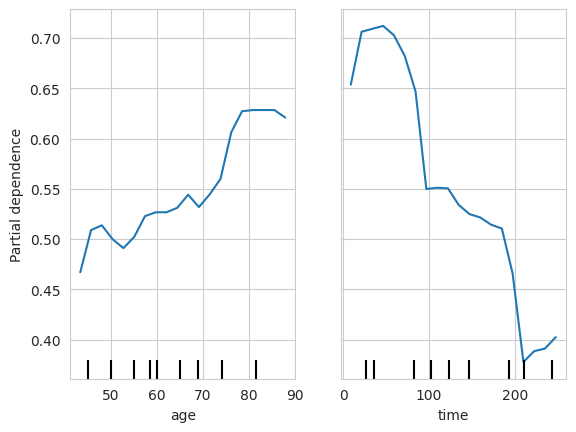

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

disp1 = PartialDependenceDisplay.from_estimator(rf, X, [0,6],grid_resolution=20)

O comportamento das variáveis nos gráficos de densidade parcial reflete os padrões observados na análise de regressão linear. Conforme a idade aumenta, a incerteza também tende a aumentar, sugerindo que pacientes mais velhos estão associados a previsões mais incertas. Por outro lado, para o tempo de acompanhamento do paciente, há uma tendência oposta: à medida que o tempo aumenta, a incerteza aleatória diminui. Isso indica que períodos mais longos de acompanhamento estão relacionados a previsões mais precisas e confiáveis (talvez por que existe um controle maior sobre os hábitos do paciente?).

### Classification Tree

Utilizamos uma árvore de classificação para examinar as regras que distinguem entre alta e baixa incerteza nas previsões. O modelo foi construído utilizando a classe DecisionTreeClassifier da biblioteca scikit-learn, com um máximo de três níveis de profundidade. Ao ajustar o modelo aos dados de treinamento (representados por X e y), a árvore de classificação ajuda a identificar padrões nos dados que permitem classificar a incerteza das previsões como alta ou baixa.








In [ ]:
model = DecisionTreeClassifier(random_state = 2,max_depth = 3)
model.fit(X,y)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [ ]:
test_incertitumbre["tipo_incerteza"].unique()

array([1, 0])

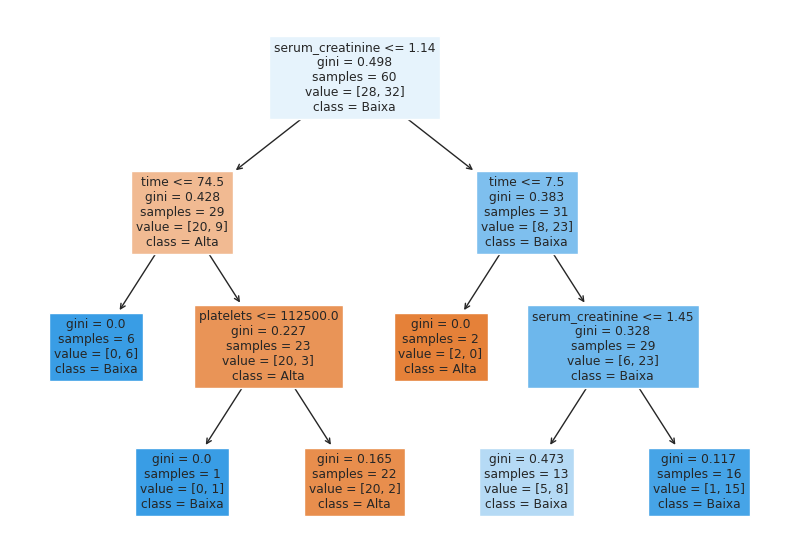

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
tree.plot_tree(model, feature_names = X.columns,
              class_names = ['Alta','Baixa'], filled = True)
plt.show()

A partir do nível inicial de creatinina, o modelo considera o tempo de acompanhamento para prever a incerteza, seguindo o ramo esquerdo da árvore. Se o nível de serum_creatinine for maior que 1,14 e o tempo de acompanhamento for menor ou igual a 75 dias, então a instância tem uma maior probabilidade de estar associada a uma alta incerteza aleatória. Da mesma forma, outras regras da árvore de decisão podem ser exploradas para fornecer insights adicionais sobre os fatores que contribuem para o aumento da incerteza das previsões.

### Regressão Logistica

A regressão logística foi utilizada para investigar globalmente os fatores que aumentam a incerteza com base na odds ratio. Nesse contexto, a análise das odds ratios estimadas para cada variável no modelo permitiu identificar quais características dos pacientes têm um efeito significativo no aumento da probabilidade de alta incerteza.

In [ ]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

# Alternatively, if it's "High"/"Low", convert it to 1/0
# test_incertitumbre['tipo_incerteza_Alta'] = test_incertitumbre['tipo_incerteza_Alta'].map({'High': 1, 'Low': 0})

# Fit logistic regression model using formula interface
model = smf.logit("tipo_incerteza~ C(sex) + C(smoking) + age + C(diabetes) + time + C(anaemia) + platelets + ejection_fraction + serum_sodium + serum_creatinine + C(high_blood_pressure)", data=test_incertitumbre).fit()

# Print model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.539862
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         tipo_incerteza   No. Observations:                   60
Model:                          Logit   Df Residuals:                       48
Method:                           MLE   Df Model:                           11
Date:                Mon, 03 Jun 2024   Pseudo R-squ.:                  0.2186
Time:                        23:45:01   Log-Likelihood:                -32.392
converged:                       True   LL-Null:                       -41.455
Covariance Type:            nonrobust   LLR p-value:                   0.07867
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.1630      8.204     -0.386      0.700   

In [ ]:
# Get the odds ratios by exponentiating the coefficients
odds_ratios = np.exp(model.params)

# Get the confidence intervals for the coefficients
conf = model.conf_int()

# Get 10% confidence interval
conf = model.conf_int(alpha=0.10)

conf.columns = ['5%', '95%']

# Exponentiate the confidence intervals to get the odds ratio confidence intervals
conf_exp = np.exp(conf)

# Combine the odds ratios and their confidence intervals into one DataFrame for better readability
results = pd.concat([odds_ratios, conf_exp], axis=1)
results.columns = ['Odds Ratio', '5%', '95%']
results['5%'] = round(results['5%'],2)
results['95%'] = round(results['95%'],2)
results['Odds Ratio'] = round(results['Odds Ratio'],2)
# Print the odds ratios with their confidence intervals
print(results)

                             Odds Ratio    5%       95%
Intercept                          0.04  0.00  30663.78
C(sex)[T.1]                        4.29  0.97     18.93
C(smoking)[T.1]                    1.52  0.38      6.04
C(diabetes)[T.1]                   2.50  0.76      8.20
C(anaemia)[T.1]                    2.08  0.69      6.23
C(high_blood_pressure)[T.1]        1.01  0.33      3.09
age                                1.04  0.99      1.08
time                               0.99  0.99      1.00
platelets                          1.00  1.00      1.00
ejection_fraction                  1.02  0.98      1.07
serum_sodium                       0.99  0.90      1.08
serum_creatinine                   1.17  0.67      2.06


No caso do modelo de regressão logística, o R² é substituído pelo pseudo R², que é uma medida da adequação do modelo. O pseudo R² desse modelo, aproximadamente 0.22, indica que cerca de 22% da variação na probabilidade de alta incerteza é explicada pelas variáveis incluídas no modelo.

Ao interpretar as odds ratios das variáveis significativas a um nível de 10%, podemos observar que:

Para a variável "sex" (sexo), a odds ratio estimada é de aproximadamente 4.29, com um intervalo de confiança de 90% variando de 0.97 a 18.93 (portanto não significante, visto que o 1 está dentro do intervalo, podemos considerar apenas marginalmente significante para continuação da análise). Isso indica que, mantendo todas as outras variáveis constantes, a probabilidade de alta incerteza é aproximadamente 4.29 vezes maior para os pacientes do sexo masculino em comparação com os do sexo feminino.

Para a variável "time" (tempo), a odds ratio estimada é de aproximadamente 0.99, com um intervalo de confiança de 90% variando de 0.99 a 1.00. Isso sugere que, para cada unidade de aumento no tempo de acompanhamento do paciente, a probabilidade de alta incerteza diminui em cerca de 1%.

### Incerteza Local

Foi utilizado o LIME (Local Interpretable Model-agnostic Explanations) para investigar localmente os efeitos de alta e baixa incerteza nas previsões de cada instância. O LIME permite compreender como as características individuais dos pacientes contribuem para as previsões específicas, fornecendo uma compreensão detalhada dos fatores que determinam a confiabilidade das previsões para casos específicos. Essa abordagem complementa a análise global das variáveis explicativas, permitindo insights mais granulares sobre a incerteza das previsões em diferentes cenários clínicos (um paciente com uma condição bastante diferente, etc).

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X.values, feature_names=X.columns.values.tolist(),
                                                  class_names=['Baixa', 'Alta'], verbose=True, mode='classification')

Escolhendo uma instância aleatória:

In [ ]:
j = 2
exp = explainer.explain_instance(X.values[j], rf.predict_proba, num_features=10)

Intercept 0.6354775216780062
Prediction_local [0.38250419]
Right: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
X.values[j]

array([65.0, 135, 35, 290000.0, 0.8, 134, 194, True, False, True, True,
       False], dtype=object)

In [ ]:
y.values[j]

array([0])

In [ ]:
# Show the predictions
exp.show_in_notebook(show_table=True)

No caso específico avaliado, a probabilidade de baixa incerteza é estimada em 84%, enquanto a probabilidade de alta incerteza é de 16%. O LIME identifica as características mais influentes para essa predição, destacando os atributos do paciente que contribuem para a previsão de baixa incerteza, são estes os níveis de creatinina sérica (serum_creatinine) em torno de 0.80, o fato de ser não fumante (smoking_1 = 0.00), o tempo de acompanhamento (time) em torno de 194 dias também parece contribuir para uma maior confiança nas previsões. Por outro lado, outras características, como a presença de anemia (anaemia_1 = 1.00), o sexo do paciente (sex_1 = 1.00) e a fração de ejeção em 35% (ejection_fraction) estão associadas a uma menor probabilidade de baixa incerteza. Essas interpretações fornecem uma compreensão detalhada de como as características individuais dos pacientes influenciam a confiabilidade das previsões do modelo em termos de alta e baixa incerteza.

Em um cenário de avaliação contínua dos pacientes, o paciente selecionado, caso resolvesse adquirir o hábito de fumar e fosse diagnosticado com diabetes provavelmente teria um aumento na probabilidade de alta incerteza aleatoria, dificultando assim a previsão de modelos para o seu caso.

## Análise de Fairness

Esta seção analisa os resultados do modelo de predição de eventos de óbito em pacientes com insuficiência cardíaca, com foco na equidade (fairness) entre os sexos masculino e feminino. Utilizamos um classificador SVM com kernel RBF para treinar o modelo e avaliamos seu desempenho em termos de métricas de classificação para ambos os sexos.

### Modelo Escolhido (SVC)

A breve análise de fairness foi conduzida sobre o modelo com melhor performance de acurácia (SVC) para avaliar possíveis disparidades de gênero na sobrevivência de pacientes com Insuficiência Cardiaca. Ao separar o conjunto de teste em homens e mulheres e calcular as taxas de verdadeiros positivos (TPR) e falsos positivos (FPR) para cada estrato da população, pudemos identificar diferenças significativas no desempenho do modelo entre os grupos de gênero.

### Avaliando o Modelo Separadamente para Homens e Mulheres e Avaliar as Taxas de Verdadeiros Positivos e Falsos Positivos para os Dois Estratos da População


In [ ]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# URL of the CSV file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"

# Send a GET request to the URL
response = requests.get(url)

# Read the content of the response as a string
data = response.text

# Use StringIO to convert the string to a file-like object
csv_file = StringIO(data)

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Now you have the data in the DataFrame 'df'
print(df.head())

X = df.drop(["DEATH_EVENT"], axis=1)
y = df[["DEATH_EVENT"]]

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.20, random_state=32, stratify=y)

# Keep a copy of the original test set before scaling
testX_original = testX.copy()

scaler = MinMaxScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

model = SVC(kernel='rbf', random_state=1, probability=True)
model.fit(trainX, np.array(trainy).reshape(-1))

print(classification_report(testy, model.predict(testX)))

# Separar o conjunto de teste em homens e mulheres
X_test_male = testX[testX_original['sex'] == 1]
X_test_female = testX[testX_original['sex'] == 0]

# Obter os índices corretos de y para homens e mulheres
male_indices = testX_original[testX_original['sex'] == 1].index
female_indices = testX_original[testX_original['sex'] == 0].index

# Indexar testy usando os índices corretos
y_test_male = testy.loc[male_indices]
y_test_female = testy.loc[female_indices]

# Predições para homens e mulheres
y_pred_male = model.predict(X_test_male)
y_pred_female = model.predict(X_test_female)

# Avaliar o modelo para homens
print("Evaluation for Males:")
print("Accuracy:", accuracy_score(y_test_male, y_pred_male))
print("Classification Report:\n", classification_report(y_test_male, y_pred_male))

# Avaliar o modelo para mulheres
print("Evaluation for Females:")
print("Accuracy:", accuracy_score(y_test_female, y_pred_female))
print("Classification Report:\n", classification_report(y_test_female, y_pred_female))

def calculate_rates(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn)  # Taxa de verdadeiros positivos
    fpr = fp / (fp + tn)  # Taxa de falsos positivos
    return tpr, fpr

# Taxas para homens
tpr_male, fpr_male = calculate_rates(y_test_male, y_pred_male)
print(f"TPR for Males: {tpr_male}")
print(f"FPR for Males: {fpr_male}")

# Taxas para mulheres
tpr_female, fpr_female = calculate_rates(y_test_female, y_pred_female)
print(f"TPR for Females: {tpr_female}")
print(f"FPR for Females: {fpr_female}")


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

#### Desempenho Geral do Modelo



O desempenho geral do modelo é avaliado nas seguintes métricas:

* Precisão (Precision): 0.76 para a classe 0 e 0.70 para a classe 1.
* Recall: 0.93 para a classe 0 e 0.37 para a classe 1.
* F1-Score: 0.84 para a classe 0 e 0.48 para a classe 1.
* Acurácia (Accuracy): 0.75

Esses resultados indicam que o modelo tem um desempenho razoável na predição de eventos de óbito, mas há um desbalanceamento notável entre as classes, com uma baixa taxa de recall para a classe 1 (eventos de óbito).



#### Desempenho por Gênero


**Homens:**

* Acurácia: 0.79
* Precision: 0.80 para a classe 0 e 0.75 para a classe 1.
* Recall: 0.92 para a classe 0 e 0.50 para a classe 1.
* F1-Score: 0.86 para a classe 0 e 0.60 para a classe 1.
* TPR (True Positive Rate): 0.50
* FPR (False Positive Rate): 0.0769

**Mulheres:**

* Acurácia: 0.68
* Precision: 0.70 para a classe 0 e 0.50 para a classe 1.
* Recall: 0.93 para a classe 0 e 0.14 para a classe 1.
* F1-Score: 0.80 para a classe 0 e 0.22 para a classe 1.
* TPR (True Positive Rate): 0.1429
* FPR (False Positive Rate): 0.0667

#### Análise de Fairness

A análise de fairness, ou equidade, é essencial para garantir que o modelo de aprendizado de máquina não discrimine contra nenhum grupo específico. Aqui, comparamos o desempenho do modelo entre homens e mulheres.

**Desempenho Discrepante entre Homens e Mulheres:**

* O modelo apresenta uma acurácia maior para homens (0.79) comparado às mulheres (0.68).
* A precisão e recall para a classe 1 (eventos de óbito) são significativamente melhores para homens do que para mulheres. O recall para homens é 0.50, enquanto para mulheres é apenas 0.14.
* O F1-score para a classe 1 é 0.60 para homens e apenas 0.22 para mulheres, indicando que o modelo é muito menos eficaz na predição de eventos de óbito para mulheres.


**Taxas de Verdadeiros e Falsos Positivos:**

* A TPR para homens é 0.50, enquanto para mulheres é apenas 0.1429, o que indica que o modelo identifica corretamente uma proporção maior de verdadeiros positivos entre os homens.
* A FPR é semelhante entre os gêneros, 0.0769 para homens e 0.0667 para mulheres, sugerindo que a taxa de falsos positivos é comparável

#### Discussão


Os resultados indicam um viés significativo do modelo em termos de equidade de gênero:

* O desempenho inferior do modelo para mulheres, especialmente na predição de eventos de óbito, levanta preocupações sobre sua aplicabilidade clínica e a equidade de seu uso em ambientes médicos.
* A diferença substancial nas métricas de recall e F1-score sugere que o modelo pode não estar capturando as características específicas que influenciam os resultados de saúde para mulheres.

### Avaliação por Tempo de Acompanhamento e Idade

Esta seção foca na avaliação de fairness do modelo de predição de eventos de óbito em pacientes com insuficiência cardíaca, com ênfase em duas variáveis críticas: o tempo de acompanhamento e a idade dos pacientes.

**Objetivos da Avaliação**

Os principais objetivos desta avaliação de fairness são:

* Verificar o Desempenho do Modelo por Tempo de Acompanhamento: Avaliar se o modelo tem um desempenho consistente para pacientes com diferentes períodos de acompanhamento.
* Verificar o Desempenho do Modelo por Idade: Avaliar se o modelo apresenta vieses em seu desempenho em diferentes faixas etárias.
* Comparar Métricas de Desempenho: Comparar a acurácia, precisão, recall, F1-score, taxa de verdadeiros positivos (TPR) e taxa de falsos positivos (FPR) entre os diferentes grupos de tempo de acompanhamento e idade.

**Metodologia**

A metodologia empregada para esta avaliação inclui:

1. Divisão do Conjunto de Teste: O conjunto de teste é dividido em grupos baseados no tempo de acompanhamento e em faixas etárias pré-definidas.
2. Cálculo de Métricas de Desempenho: Para cada grupo, são calculadas as principais métricas de desempenho do modelo, incluindo acurácia, precisão, recall, F1-score, TPR e FPR.
3. Análise Comparativa: As métricas são comparadas entre os diferentes grupos para identificar possíveis disparidades no desempenho do modelo.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Função para calcular as taxas de verdadeiros e falsos positivos
def calculate_rates(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn)  # Taxa de verdadeiros positivos
    fpr = fp / (fp + tn)  # Taxa de falsos positivos
    return tpr, fpr

# Avaliação por grupos de tempo de acompanhamento
def evaluate_by_group(testX_original, testy, testX, group_col, thresholds):
    results = []
    for i in range(len(thresholds) - 1):
        lower, upper = thresholds[i], thresholds[i+1]
        group_mask = (testX_original[group_col] > lower) & (testX_original[group_col] <= upper)
        X_test_group = testX[group_mask]
        y_test_group = testy[group_mask]

        if len(y_test_group) > 0:
            y_pred_group = model.predict(X_test_group)
            acc = accuracy_score(y_test_group, y_pred_group)
            report = classification_report(y_test_group, y_pred_group, output_dict=True)
            tpr, fpr = calculate_rates(y_test_group, y_pred_group)
            results.append({
                'group': f'{lower} < {group_col} <= {upper}',
                'accuracy': acc,
                'precision_0': report['0']['precision'],
                'recall_0': report['0']['recall'],
                'f1_0': report['0']['f1-score'],
                'precision_1': report['1']['precision'],
                'recall_1': report['1']['recall'],
                'f1_1': report['1']['f1-score'],
                'tpr': tpr,
                'fpr': fpr
            })
    return pd.DataFrame(results)

# Definir os limiares para os grupos de tempo de acompanhamento e idade
time_thresholds = [testX_original['time'].min() - 1, 50, testX_original['time'].max()]
age_thresholds = [testX_original['age'].min() - 1, 50, 70, testX_original['age'].max()]

# Avaliar fairness por tempo de acompanhamento
time_fairness_results = evaluate_by_group(testX_original, testy, testX, 'time', time_thresholds)
print("Fairness by Follow-up Time:")
print(time_fairness_results)

# Avaliar fairness por idade
age_fairness_results = evaluate_by_group(testX_original, testy, testX, 'age', age_thresholds)
print("Fairness by Age:")
print(age_fairness_results)

Fairness by Follow-up Time:
              group  accuracy  precision_0  recall_0      f1_0  precision_1  \
0    3 < time <= 50  0.500000     0.000000  0.000000  0.000000     0.777778   
1  50 < time <= 270  0.826087     0.844444  0.974359  0.904762     0.000000   

   recall_1      f1_1       tpr       fpr  
0  0.583333  0.666667  0.583333  1.000000  
1  0.000000  0.000000  0.000000  0.025641  
Fairness by Age:
              group  accuracy  precision_0  recall_0      f1_0  precision_1  \
0  39.0 < age <= 50  0.733333     0.769231  0.909091  0.833333          0.5   
1    50 < age <= 70  0.781250     0.821429  0.920000  0.867925          0.5   
2  70 < age <= 90.0  0.692308     0.555556  1.000000  0.714286          1.0   

   recall_1      f1_1       tpr       fpr  
0  0.250000  0.333333  0.250000  0.090909  
1  0.285714  0.363636  0.285714  0.080000  
2  0.500000  0.666667  0.500000  0.000000  


#### Análise dos Resultados: Fairness por Tempo de Acompanhamento e Idade


**Fairness por Tempo de Acompanhamento**

* Grupos de Tempo:

*3 < time <= 50*

1. Acurácia: 0.50
2. Precisão (classe 0): 0.00
3. Recall (classe 0): 0.00
4. F1-Score (classe 0): 0.00
5. recisão (classe 1): 0.78
6. Recall (classe 1): 0.58
7. F1-Score (classe 1): 0.67
8. TPR: 0.58
9. FPR: 1.00

*50 < time <= 270*

1. Acurácia: 0.83
2. Precisão (classe 0): 0.84
3. Recall (classe 0): 0.97
4. F1-Score (classe 0): 0.90
5. Precisão (classe 1): 0.00
6. Recall (classe 1): 0.00
7. F1-Score (classe 1): 0.00
8. TPR: 0.00
9. FPR: 0.03


**Análise:**

* Desempenho em Curto Prazo (3 < time <= 50): O modelo apresenta um desempenho significativamente inferior, especialmente na predição da classe 0 (não morte), onde a precisão, recall e F1-score são todos zero. A acurácia geral é baixa (0.50), indicando que o modelo não está performando bem para pacientes com um tempo de acompanhamento menor.
* Desempenho em Longo Prazo (50 < time <= 270): O modelo mostra um desempenho muito melhor, com alta acurácia (0.83) e bons valores de precisão, recall e F1-score para a classe 0. No entanto, o desempenho para a classe 1 é inexistente (precisão, recall e F1-score são zero), indicando que o modelo não está identificando corretamente os eventos de morte nesse grupo.


**Fairness por Idade**

* Grupos de Idade:

*39.0 < age <= 50*

1. Acurácia: 0.73
2. Precisão (classe 0): 0.77
3. Recall (classe 0): 0.91
4. F1-Score (classe 0): 0.83
5. Precisão (classe 1): 0.50
6. Recall (classe 1): 0.25
7. F1-Score (classe 1): 0.33
8. TPR: 0.25
9. FPR: 0.09

*50 < age <= 70*

1. Acurácia: 0.78
2. Precisão (classe 0): 0.82
3. Recall (classe 0): 0.92
4. F1-Score (classe 0): 0.87
5. Precisão (classe 1): 0.50
6. Recall (classe 1): 0.29
7. F1-Score (classe 1): 0.36
8. TPR: 0.29
9. FPR: 0.08

*70 < age <= 90.0*

1. Acurácia: 0.69
2. Precisão (classe 0): 0.56
3. Recall (classe 0): 1.00
4. F1-Score (classe 0): 0.71
5. Precisão (classe 1): 1.00
6. Recall (classe 1): 0.50
7. F1-Score (classe 1): 0.67
8. TPR: 0.50
9. FPR: 0.00

**Análise:**

* Idade 39.0 < age <= 50: O modelo apresenta uma acurácia razoável (0.73) e bom desempenho na classe 0, mas o desempenho na classe 1 é relativamente baixo (F1-score de 0.33), indicando dificuldades em prever eventos de morte nesta faixa etária.
* Idade 50 < age <= 70: O desempenho é melhor nesta faixa etária, com acurácia de 0.78 e bons resultados para a classe 0. No entanto, o desempenho na classe 1 ainda é fraco (F1-score de 0.36), sugerindo que o modelo ainda tem dificuldades com a predição de eventos de morte.
* Idade 70 < age <= 90.0: O modelo apresenta uma acurácia menor (0.69), mas interessante é que o desempenho para a classe 1 melhora significativamente (F1-score de 0.67), embora a precisão e recall para a classe 0 estejam desbalanceados.

#### Discussão dos Resultados

Os resultados indicam disparidades significativas no desempenho do modelo entre diferentes grupos de tempo de acompanhamento e faixas etárias. Algumas observações importantes incluem:

* Desempenho por Tempo de Acompanhamento: O modelo tem um desempenho inferior para pacientes com um tempo de acompanhamento mais curto (3 < time <= 50). Isto pode ser devido à menor quantidade de dados ou à complexidade dos casos que requerem acompanhamento mais longo. O desempenho melhora significativamente para tempos de acompanhamento mais longos (50 < time <= 270), mas a capacidade de predizer a classe 1 (morte) é limitada.
* Desempenho por Idade: O desempenho do modelo varia com a idade. Para pacientes mais jovens (39.0 < age <= 50), o modelo tem um bom desempenho na predição da classe 0, mas luta para prever corretamente a classe 1. O grupo intermediário (50 < age <= 70) mostra o melhor equilíbrio entre precisão e recall, enquanto para os pacientes mais velhos (70 < age <= 90.0), o modelo melhora significativamente na predição da classe 1, mas ainda apresenta desafios na classe 0.


## Conclusão

Com base nas análises da incerteza das previsões em casos de insuficiência cardíaca, podemos chegar a algumas conclusões importantes. Primeiramente, a modelagem e interpretação dos dados revelaram que características específicas dos pacientes, como a **idade** e **tempo de acompanhamento**, desempenham um papel significativo na determinação da probabilidade de alta ou baixa incerteza nas previsões do modelo. Em particular, pacientes com maior tempo de acompanhamento, tendem a apresentar uma maior probabilidade de baixa incerteza nas previsões. Por outro lado, o aumento da idade do paciente está associado a uma maior probabilidade de alta incerteza. Além disso, técnicas avançadas, como regressão logística, árvores de decisão e LIME, demonstram como essas características individuais afetam as previsões do modelo em nível global e local.

Essas descobertas destacam a importância de considerar uma variedade de variáveis clínicas e demográficas ao avaliar a confiabilidade das previsões em modelos. Compreender como diferentes características dos pacientes influenciam a incerteza nas previsões pode auxiliar os profissionais de saúde na tomada de decisões clínicas mais informadas e personalizadas. Além disso, a capacidade de interpretar e explicar a incerteza das previsões do modelo aumenta a transparência e confiança na sua utilização na prática médica.

A análise do desempenho do modelo SVC revela disparidades significativas entre homens e mulheres, destacando a necessidade de abordagens específicas para garantir a equidade no uso de modelos de aprendizado de máquina em ambientes clínicos. A implementação de técnicas como Modelos Específicos por Gênero, Rebalanceamento e Feature Engineering Sensível ao Gênero podem ajudar a mitigar essas desigualdades e promover um tratamento mais justo para todos os pacientes. A análise de fairness revelou disparidades significativas no desempenho do modelo entre diferentes grupos de tempo de acompanhamento e faixas etárias. Estas disparidades destacam a necessidade de ajustes e melhorias no modelo para garantir que ele seja justo e equitativo para todos os pacientes.